# Import relevant libraries.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import dataframe with pd.read_csv()

In [6]:
#set_index('date')
df=pd.read_csv("fcc-forum-pageviews.csv", parse_dates=True).set_index('date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


# Clean data

In [7]:
# 0.025 < data < 0.075
df=df.drop(df[(df['value']<df['value'].quantile(0.025)) | (df['value']>df['value'].quantile(0.975))].index)
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


# Draw Line Plot 

Text(0, 0.5, 'Page Views')

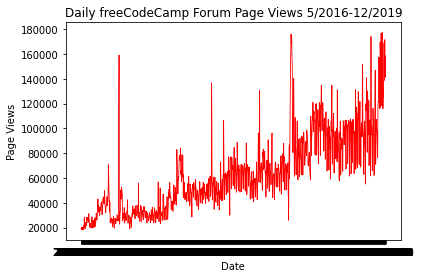

In [65]:
plt.plot(df['value'],color='red',linewidth=0.8)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

# Draw Bar Plot

In [16]:
# add 'Year' and 'Month' column
df_bar = df.copy()
df_bar['Year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['Month'] = pd.DatetimeIndex(df_bar.index).month

#group by 'Year', 'Month' display average values.
df_bar = df_bar.groupby(['Year', 'Month'])['value'].mean()
df_bar = df_bar.unstack()

df_bar.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


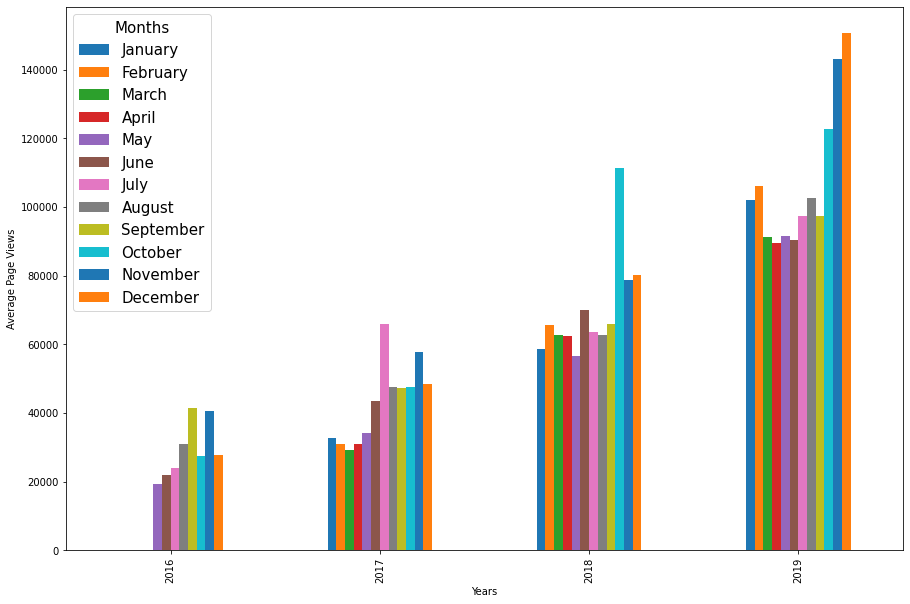

In [68]:
#Draw the bar plot
month_names=['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December']
fig = df_bar.plot(kind = 'bar', figsize = (15,10)).figure

plt.title("")
plt.xlabel('Years')
plt.ylabel("Average Page Views")
lg = plt.legend(title= "Months", fontsize = 15, labels = month_names)
title = lg.get_title()
title.set_fontsize(15)

# Draw a box plot

In [17]:
#Add 'Year', 'Month' column in df_box
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['Year'] = pd.DatetimeIndex(df_box['date']).year
df_box['Month'] = pd.DatetimeIndex(df_box['date']).month

df_box.head()

,date,value,Year,Month
0,2016-05-19,19736,2016,5
1,2016-05-26,18060,2016,5
2,2016-05-27,19997,2016,5
3,2016-05-28,19044,2016,5
4,2016-05-29,20325,2016,5


[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

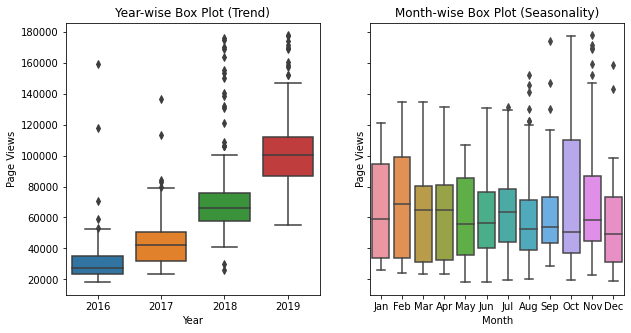

In [24]:
#draw both boxplots using plt.sublots() and seaborn.
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, axes = plt.subplots(nrows = 1, ncols =2, figsize=(10,5), sharey=True)

sns.boxplot(ax= axes[0], x='Year', y='value', data = df_box)
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
  
sns.boxplot(ax= axes[1], x='Month', y='value', data = df_box)
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
axes[1].set_xticklabels(month_labels)
